Building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

My audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

In [1]:
#import important libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

Dataset Columns Description
state: 

U.S. state where the customer resides (categorical)

account length: Number of days the customer has had the account (integer)

area code: Customer’s area code (integer)

phone number: Customer’s phone number (identifier, usually dropped)

international plan: Whether customer has international calling plan (Yes/No)

voice mail plan: Whether customer has voicemail plan (Yes/No)

number vmail messages: Number of voicemail messages (integer)

total day minutes: Total minutes of calls during the day (float)

total day calls: Number of calls during the day (integer)

total day charge: Charges for day calls (float)

total eve minutes: Total minutes of calls in the evening (float)

total eve calls: Number of calls in the evening (integer)

total eve charge: Charges for evening calls (float)

total night minutes: Total minutes of calls at night (float)

total night calls: Number of calls at night (integer)

total night charge: Charges for night calls (float)

total intl minutes: Total minutes of international calls (float)

total intl calls: Number of international calls (integer)

total intl charge: Charges for international calls (float)

customer service calls: Number of calls to customer service (integer)

churn: Whether the customer churned (True/False) — target variable



In [3]:
#Load the dataset
churn=pd.read_csv(r"C:\Users\USER\Downloads\archive\bigml_59c28831336c6604c800002a.csv")
churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#check the shape of the dataset
print(f"The dataset has {churn.shape[0]} rows")
print(f"The dataset has {churn.shape[1]} columns")

The dataset has 3333 rows
The dataset has 21 columns


In [5]:
#understand the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#check for null values
churn.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Has no null values

In [8]:
#checking for datatypes
churn.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [ ]:
churn['state'].unique()#has many unique values, so we will drop it

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
#  Drop non-informative columns
df = churn.drop(columns=['phone number', 'state'])

# 2. Encode 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# 4. Convert target to int if needed
df['churn'] = df['churn'].astype(int)


In [ ]:
df.head()#now the data has been encoded and cleaned

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Churn is our target variable

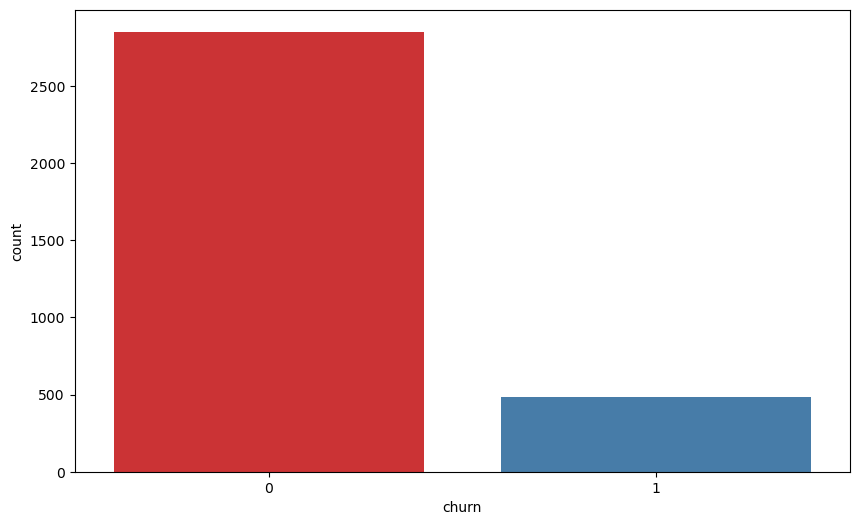

In [13]:
#visualize some of the features to be able to understand the dataset
plt.figure(figsize=(10,6))
sns.countplot(x='churn', data=df, palette='Set1')
plt.show()

Interpretation of the Plot

Class 0 : Has more samples — around 3000+.

Class 1: Has fewer samples — around 500+.

Churn means when a customer stops using a company's service or cancels their subscription.

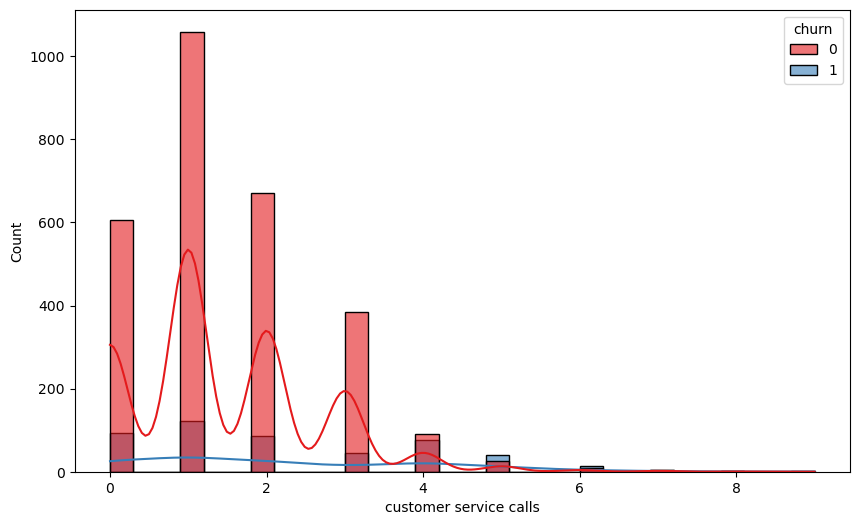

In [ ]:
#visialize customer service calls and churn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='customer service calls', hue='churn', bins=30, kde=True, palette='Set1', alpha=0.6)
plt.show()

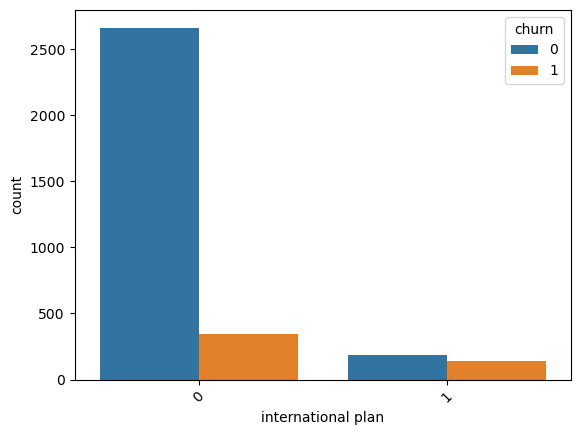

In [19]:
sns.countplot(data=df, x='international plan', hue='churn')
plt.xticks(rotation=45)
plt.show()

A higher proportion of customers with an international plan  tend to churn, compared to those without it.

While most customers do not have an international plan, among those who do, the churn rate is significantly higher.

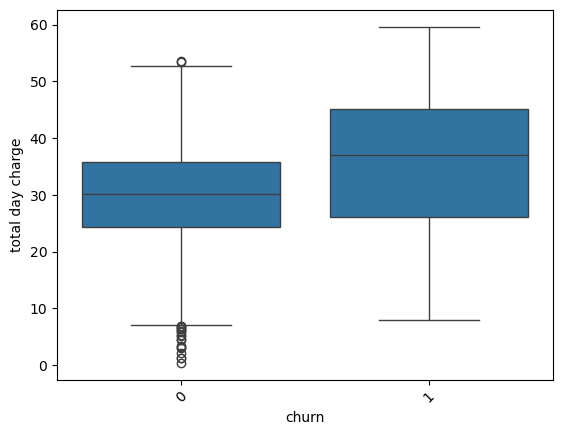

In [17]:
sns.boxplot(data=df[df['total day charge'] > 0], x='churn', y='total day charge')
plt.xticks(rotation=45)
plt.show()

According to our data we can see that people who pay 25 to 35 tend to stay and most of those who go pay 25 and 45

Customers labeled **1** (churned) tend to have higher total day charge on average.

Customers labeled **0** (did not churn) have lower charges and more outliers on the lower end.

international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
voice mail plan          -0.102148
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages    -0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls         -0.052844
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
Name: churn, dtype: float64


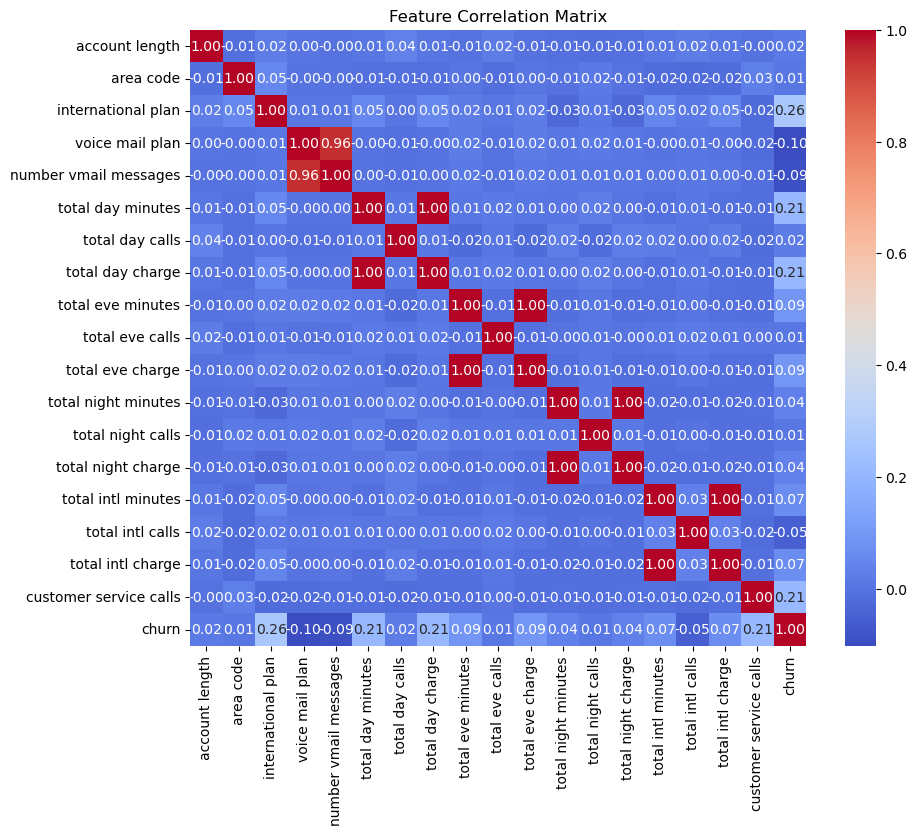

In [18]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Display correlation with target (churn) only, sorted
churn_corr = corr_matrix['churn'].drop('churn').sort_values(key=abs, ascending=False)
print(churn_corr)

#Visualize the full correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

Most positively correlated with churn:

international plan: 0.26 → Strongest correlation; customers with an international plan are more likely to churn.

customer service calls: 0.21 → The more calls to customer service, the higher the likelihood of churn.

total day minutes / total day charge: 0.205 → Heavy daytime users tend to churn more.

MODELLING

In [21]:
#Finding our x and y variables
X=df.drop('churn', axis=1)
y=df['churn']

In [22]:
#checking the x and y
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

Creating a training and test split

This is where we'll split our data into a training set and a test set.

We'll use our training set to train our model and our test set to evaluate it.

In [24]:
#splitting the data 
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42, test_size=0.2)
#standardizing the data
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Checking which model we will use in our prediction

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Let's find out which model performs better 
# Put models in a dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8590704647676162,
 'Logistic Regression': 0.8515742128935532,
 'Decision Tree': 0.9190404797601199,
 'XGBoost': 0.9535232383808095}

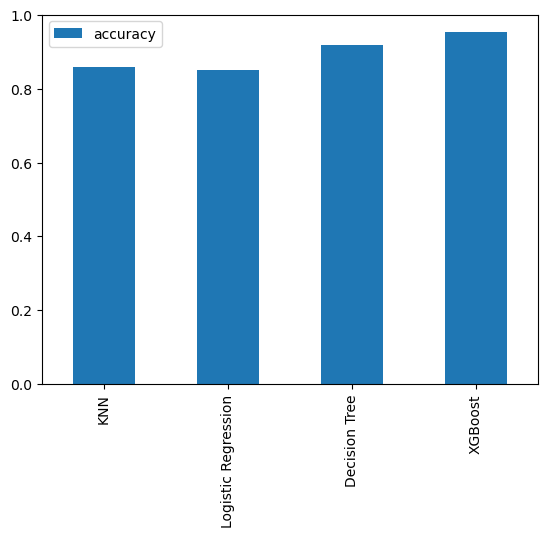

In [27]:

#Visualizing the model scores
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

This gives us the best models that we can use to explain our output and we have seen XGboost and decision tree  are the best to use here and logistic is sligtly better than KNN.

Accuracy: 0.86
F1 Score: 0.27
Precision Score: 0.60
Recall Score: 0.18
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



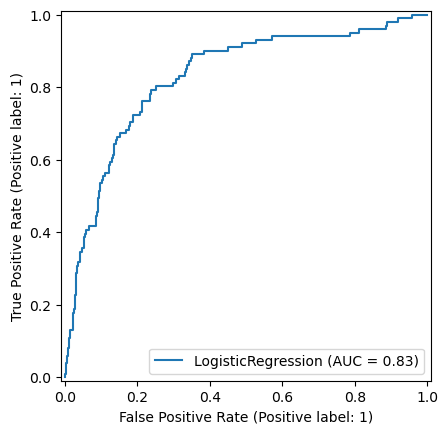

In [28]:
#without hyperparameter tuning
model = LogisticRegression()
# fitting the model
model.fit(X_train_scaled, y_train)
# predicting the model
y_pred = model.predict(X_test_scaled)
# checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
# classification report
print(classification_report(y_test, y_pred))
# Roc curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.86
F1 Score: 0.27
Precision Score: 0.60
Recall Score: 0.18

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



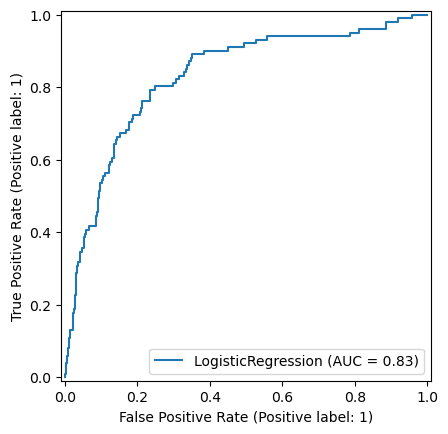

In [29]:
#with hyperparemeter tuning 
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports l1 and l2
}

# Create model
log_reg = LogisticRegression()

# Grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Predict using best model
y_pred = best_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC curve
RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test)


We can see that hyperparemeter tuning doesnt do much in this model of ours lets focus on XGboost and decision tree classifier 


 Hyperparameter Tuning with DecisionTreeClassifier

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.94
F1 Score: 0.78
Precision Score: 0.85
Recall Score: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       566
           1       0.85      0.72      0.78       101

    accuracy                           0.94       667
   macro avg       0.90      0.85      0.87       667
weighted avg       0.94      0.94      0.94       667



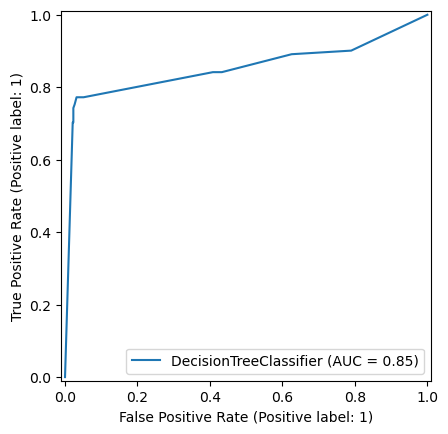

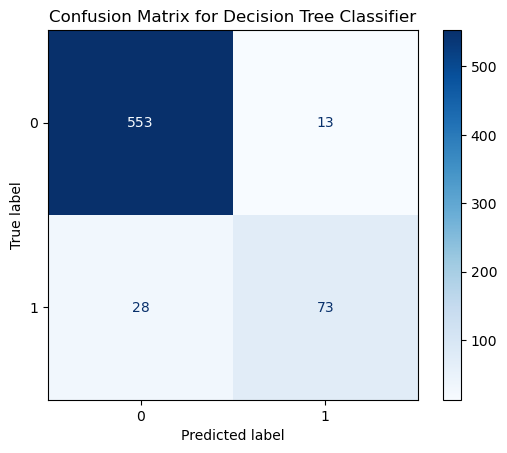

In [40]:
# Create base model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predictions
y_pred = best_dt.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC curve
RocCurveDisplay.from_estimator(best_dt, X_test_scaled, y_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


 XGBoost with Hyperparameter Tuning via GridSearchCV

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.95
F1 Score: 0.81
Precision Score: 0.91
Recall Score: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.94       667



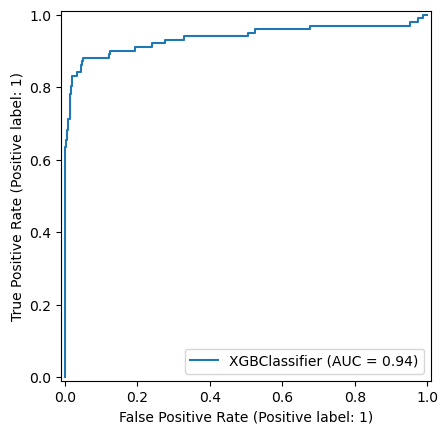

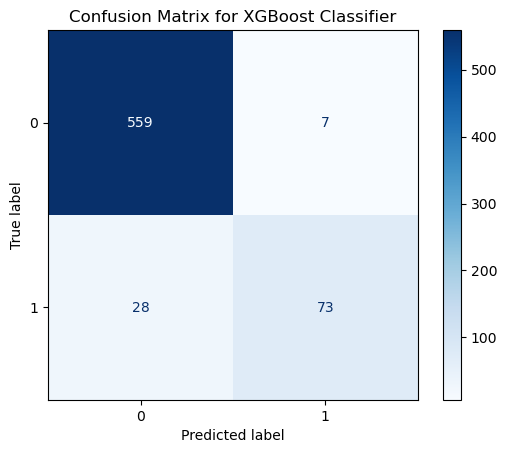

In [39]:
# Create base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    # Optional if class imbalance: 'scale_pos_weight': [1, sum(neg)/sum(pos)]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC curve
RocCurveDisplay.from_estimator(best_xgb, X_test_scaled, y_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)   
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()


Key Observations:

Xgboost is the best model so far caccording to the models weve done 

True Negatives (559): The model correctly identified 559 customers who are not likely to churn, meaning we avoid wasting retention efforts on them.

True Positives (73): The model correctly identified 73 customers who are likely to churn, allowing the company to proactively intervene.

False Positives (7): Only 7 customers were wrongly predicted to churn, which is minimal and manageable.

False Negatives (28): 28 customers who were actually going to churn were missed by the model—this is the most critical issue, as these customers could leave without any retention attempt.

This has greatluy improved our AUC and we can see that 0.94 is almost close to 1 indicating a good prediction

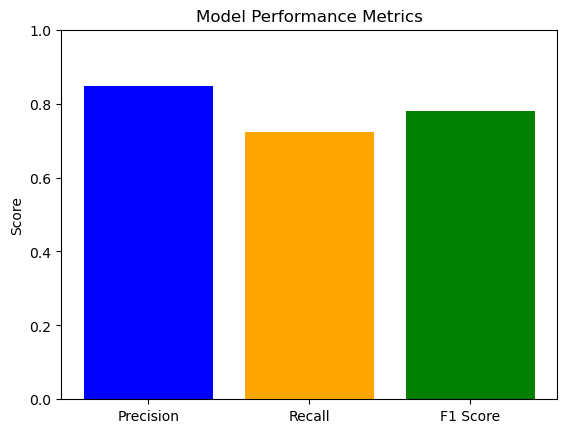

In [33]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1 Score']

plt.bar(labels, scores, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

In [34]:
# Feature importance using Logistic Regression
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [35]:
# Check coef_
clf.coef_

array([[ 0.04964802,  0.08913671,  0.70285506, -0.67505934,  0.29862874,
         0.33552524,  0.00097989,  0.33587658,  0.1388482 ,  0.01605994,
         0.13746879,  0.07406511, -0.035599  ,  0.07230742,  0.10363567,
        -0.18729261,  0.10876817,  0.77703578]])

In [37]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'account length': np.float64(0.0496480152240457),
 'area code': np.float64(0.08913671199789377),
 'international plan': np.float64(0.702855064398583),
 'voice mail plan': np.float64(-0.6750593395517336),
 'number vmail messages': np.float64(0.29862874225929575),
 'total day minutes': np.float64(0.3355252434434125),
 'total day calls': np.float64(0.0009798904627800554),
 'total day charge': np.float64(0.3358765758809967),
 'total eve minutes': np.float64(0.13884819984410024),
 'total eve calls': np.float64(0.016059944243837755),
 'total eve charge': np.float64(0.13746879210395108),
 'total night minutes': np.float64(0.07406511152676841),
 'total night calls': np.float64(-0.035598997267724794),
 'total night charge': np.float64(0.07230742307499437),
 'total intl minutes': np.float64(0.10363567172014354),
 'total intl calls': np.float64(-0.18729261463005892),
 'total intl charge': np.float64(0.10876817238069567),
 'customer service calls': np.float64(0.7770357759892389)}

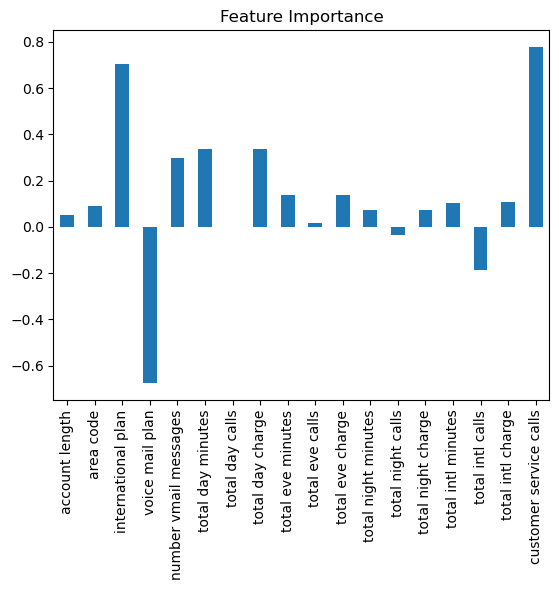

In [38]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

Our model reveals clear and predictable patterns in customer behavior. The most critical indicator of churn is the number of customer service calls. Customers who contact support frequently are significantly more likely to leave, which may point to unresolved issues, dissatisfaction, or poor service experiences. This suggests that improving customer support quality or implementing early intervention strategies when call volume increases could reduce churn.